In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Charger la matrice 

In [2]:
matrice1 = np.zeros((8, 8))

def matrice_web(matrice):
    with open("courtois.txt") as f:
        l = 0
        l_m = 0

        for ligne in f:
            col = ligne.split()
            if l > 1:
                for i in range(2, len(col), 2):
                    matrice[l_m, int(col[i])-1] = float(col[i+1])
                l_m = l_m + 1 
            l = l + 1
    return matrice

matrice_web(matrice1)

array([[8.500e-01, 0.000e+00, 1.490e-01, 9.000e-04, 0.000e+00, 5.000e-05,
        0.000e+00, 5.000e-05],
       [1.000e-01, 6.500e-01, 2.490e-01, 0.000e+00, 9.000e-04, 5.000e-05,
        0.000e+00, 5.000e-05],
       [1.000e-01, 8.000e-01, 9.960e-02, 4.000e-04, 0.000e+00, 0.000e+00,
        1.000e-04, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [5.000e-04, 0.000e+00, 4.000e-04, 3.900e-01, 6.000e-01, 1.000e-04,
        0.000e+00, 0.000e+00],
       [0.000e+00, 5.000e-05, 0.000e+00, 0.000e+00, 5.000e-05, 6.000e-01,
        2.499e-01, 1.500e-01],
       [3.000e-05, 0.000e+00, 3.000e-05, 4.000e-05, 0.000e+00, 1.000e-01,
        8.000e-01, 9.990e-02],
       [0.000e+00, 5.000e-05, 0.000e+00, 0.000e+00, 5.000e-05, 1.999e-01,
        2.500e-01, 5.500e-01]])

## Calcul Pagerank de google

In [3]:
def pagerank(matrice, nb_page):
    coef = 0.85
    epsilon = 0.005

    v = np.random.rand(nb_page, 1)
    v = v / np.linalg.norm(v, 1)

    m = coef * matrice + (1 - coef) / nb_page

    for i in range(100):
        v2 = m @ v
        if np.linalg.norm(v2 - v, 1) < epsilon:
            break
        v = v2
    return v

## Modification graphe de web

### Identifier les pages sans lien de sortie

In [4]:
ligne_null = []
for i, ligne in enumerate(matrice1):
    if all(element == 0 for element in ligne):
        ligne_null.append(i+1)
print("Les pages sans lien de sortie : ", ligne_null)

dupli = 0
for page in matrice1:
    if page[3] != 0:
        dupli += 1

print("Nombre de duplication à faire : ", dupli)

Les pages sans lien de sortie :  [4]
Nombre de duplication à faire :  4


### Graphe du web modifié

In [5]:
nom = 1
flag = True

with open("courtois.txt", "r") as f:
    lignes = f.readlines()
    with open("courtoisV2.txt", "w") as f2:
        for i in lignes:
            liste = i[3:].split()
            for ele in liste:
                if ele == "4":
                    f2.write(i.replace(" 4 ", " (4,"+ str(nom)+") "))
                    nom += 1
                    flag = False
            if flag:
                f2.write(i)
            flag = True

with open("courtoisV2.txt", "a") as f2:
    for i in range(nom - 1):
        f2.write("\n(4,"+ str(i)+")" + " 0")


In [6]:
matrice2 = np.zeros((12,12))

with open("courtoisV2.txt") as f:
    l = 0
    l_m = 0

    for ligne in f:
        col = ligne.split()
        if l > 1:
            for i in range(2, len(col), 2):
                try:
                    matrice2[l_m, int(col[i])-1] = float(col[i+1])
                except ValueError:
                    matrice2[l_m, int(col[i][1])-1] = float(col[i+1])       
            l_m = l_m + 1 
        l = l + 1

In [12]:
orig = pagerank(matrice1, len(matrice1))
print(orig)

[[0.02672267]
 [0.02673853]
 [0.02674536]
 [0.00335085]
 [0.00951353]
 [0.02683384]
 [0.02683371]
 [0.02683384]]


In [14]:
modif = pagerank(matrice2, len(matrice2))
modif[3] += np.sum(modif[-4:], axis=0)
print(modif)

[[0.01111854]
 [0.01112481]
 [0.01112832]
 [0.00499141]
 [0.0030032 ]
 [0.01106758]
 [0.01106759]
 [0.01106758]
 [0.00099828]
 [0.00099828]
 [0.00099828]
 [0.00099828]]


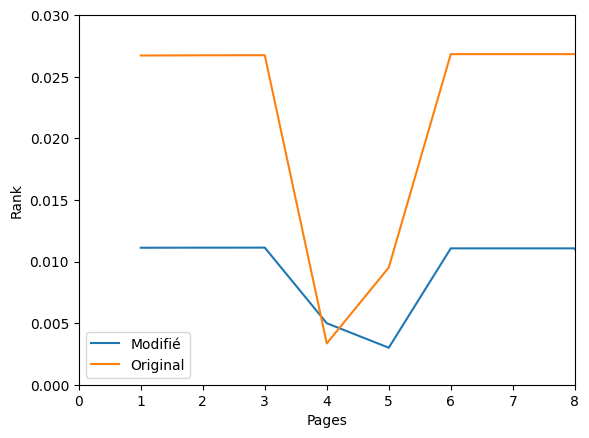

In [18]:
x = np.arange(1, len(matrice2)+1)
x2 = np.arange(1, len(matrice1)+1)

plt.plot(x, modif, label="Modifié")
plt.plot(x2, orig, label="Original")
plt.xlim(0, 8)
plt.ylim(0, 0.030)
plt.xlabel("Pages")
plt.ylabel("Rank")
plt.legend()
plt.show()

## Sur des plus grosse données 

In [16]:
matrice3 = np.zeros((10000, 10000), dtype=np.float32)


with open("Stanford_BerkeleyV2.txt") as f:
    l = 0
    l_m = 0
    for ligne in f:
        col = ligne.split()
        if l > 1:
            for i in range(2, len(col), 2):
                try:
                    matrice3[l_m, int(col[i]) - 1] = float(col[i+1])
                except IndexError:
                    pass
            l_m = l_m + 1 
        l = l + 1

In [17]:
l_null = []
for i, ligne in enumerate(matrice3):
    if all(element == 0 for element in ligne):
        l_null.append(i+1)

print("Nombre de pages sans lien de sortie : ", len(l_null))

Nombre de pages sans lien de sortie :  177


In [19]:
l_dupli = [0] * 177

for page in matrice3:
    for i, val in enumerate(l_null):
        if page[val-1] != 0:
            l_dupli[i] += 1


print("Nombre de duplication à faire : ", l_dupli)
print("Les pages sans lien de sortie", l_null)

Nombre de duplication à faire :  [17, 17, 17, 17, 2, 5, 5, 29, 5, 5, 29, 5, 5, 29, 4, 5, 29, 5, 5, 5, 5, 5, 5, 28, 5, 30, 5, 30, 5, 5, 5, 5, 5, 5, 5, 5, 5, 30, 5, 29, 5, 5, 5, 28, 30, 5, 5, 5, 30, 5, 5, 5, 30, 5, 5, 29, 4, 5, 29, 5, 5, 30, 4, 5, 29, 5, 5, 29, 5, 5, 29, 5, 5, 5, 5, 5, 5, 29, 5, 30, 5, 30, 5, 5, 5, 4, 5, 5, 5, 5, 5, 29, 5, 30, 5, 5, 5, 5, 29, 29, 5, 5, 5, 29, 5, 5, 5, 30, 4, 5, 29, 5, 30, 5, 5, 24, 4, 5, 27, 5, 28, 5, 5, 29, 5, 5, 5, 5, 5, 29, 5, 30, 5, 30, 5, 5, 5, 5, 5, 5, 5, 5, 5, 27, 5, 30, 5, 5, 5, 5, 30, 30, 5, 5, 5, 5, 5, 30, 5, 5, 30, 4, 5, 24, 24, 24, 24, 24, 24, 24, 24, 24, 5, 24, 24, 24, 24]
Les pages sans lien de sortie [25, 26, 27, 28, 794, 1081, 1099, 1116, 1285, 1304, 1321, 1490, 1509, 1526, 1674, 1692, 1710, 1813, 1856, 1898, 1939, 2055, 2076, 2093, 2234, 2252, 2322, 2325, 2381, 2436, 2482, 2525, 2567, 2609, 2650, 2691, 2749, 2767, 2836, 2839, 2950, 3059, 3075, 3092, 3125, 3193, 3304, 3322, 3340, 3441, 3551, 3569, 3587, 3754, 3772, 3789, 3958, 3976, 3993,

In [20]:
def change(a, b):
   ma = a.split()
   mb = b.split()
   nouvelle_chaine = ""
   for i, mot1 in enumerate(ma):
      if ma[i] == mb[i]:
         nouvelle_chaine += ma[i] + " "
      if ma[i] != mb[i] and "(" in ma[i]:
         nouvelle_chaine += ma[i] + " "
      if ma[i] != mb[i] and "(" in mb[i]:
         nouvelle_chaine += mb[i] + " "
   return nouvelle_chaine

l_nom = [1] * 177
flag = True
a = str

with open("Stanford_BerkeleyV2.txt", "r") as f:
    lignes = f.readlines()
    with open("Stanford_BerkeleyV3.txt", "w") as f2:
        for i in range(10000):
            liste = lignes[i].split()
            b = lignes[i]
            for index in range(0, len(liste), 2):
                if int(liste[index]) in l_null and len(lignes[i]) > 8:
                    a = lignes[i].replace(" "+liste[index]+" ", " ("+liste[index]+"," + str(l_nom[l_null.index(int(liste[index]))])+") ")
                    b = change(a, b)
                    l_nom[l_null.index(int(liste[index]))] += 1
                    flag = False

            if flag == False:
                f2.write(b+"\n")
                flag = True
            else:
                f2.write(lignes[i])

In [21]:
cpt = 0

with open("Stanford_BerkeleyV3.txt", "a") as f2:
    for page in l_null:
        for i in range(l_nom[cpt]-1):
            f2.write("\n("+str(page)+","+ str(i)+")" + " 0")

In [22]:
matrice4 = np.zeros((16017, 16017), dtype=np.float32)

with open("Stanford_BerkeleyV3.txt") as f:
    l = 0
    l_m = 0
    for ligne in f:
        col = ligne.split()
        if l > 1:
            for i in range(2, len(col), 2):
                try:
                    matrice4[l_m, int(col[i]) - 1] = float(col[i+1])
                except IndexError:
                    pass
                except ValueError:
                    matrice4[l_m, int(col[i][1])-1] = float(col[i+1])       
            l_m = l_m + 1 
        l = l + 1

In [23]:
modif2 = pagerank(matrice4, len(matrice4))
original = pagerank(matrice3, len(matrice3))

l1 = [7830, 7848, 7951, 7993, 8074, 8187, 8209, 8226, 8365, 8383, 8453, 8456, 8512, 8568, 8612, 8655, 8698, 8740, 8781, 8821, 8891, 8906, 8976, 8979, 9035, 9090, 9200, 9218, 9236, 9269, 9335, 9377, 9417, 9524, 9542, 9560, 9726, 9743, 9761, 9873, 9883, 9949, 9950, 9951, 9952, 9957, 9986, 9987, 9988, 9989, 9992, 9995, 9996, 9997, 9998, 2749, 2767, 2836, 2839, 2950, 3059, 3075, 3092, 3125, 3193, 3304, 3322, 3340, 3441, 3551, 3569, 3587, 3754]
l2 = [25, 26, 27, 28, 794, 1081, 1099, 1116, 1285, 1304, 1321, 1490, 1509, 1526, 1674, 1692, 1710, 1813, 1856, 1898, 1939, 2055, 2076, 2093, 2234, 2252, 2322, 2325, 2381, 2436, 2482, 2525, 2567, 2609, 2650, 2691, 3772, 3789, 3958, 3976, 3993, 4144, 4162, 4180, 4342, 4359, 4376, 4545, 4564, 4581, 4749, 4767, 4784, 4886, 4928, 4970, 5011, 5126, 5147, 5165, 5305, 5323, 5393, 5396, 5451, 5508, 5553, 5596, 5640, 5682, 5725, 5767, 5841, 5858, 5928, 5931, 5984, 6039, 6149, 6167, 6184, 6217, 6284, 6395, 6412, 6430, 6526, 6632, 6650, 6668, 6832, 6850, 6867, 7035, 7070, 7232, 7248, 7261, 7412, 7430, 7446, 7628, 7645, 7813]

for i in l1:
    modif2[i] += np.sum(modif2[-24:], axis=0)
for i in l2:
    modif2[i] += np.sum(modif2[-7:], axis=0)

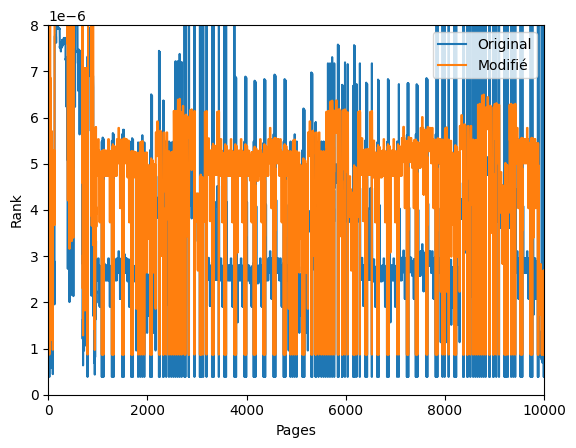

In [25]:
x = np.arange(1, len(matrice4)+1)
x2 = np.arange(1, len(matrice3)+1)

plt.plot(x, modif2, label="Original")
plt.plot(x2, original, label="Modifié")
plt.xlim(0, 10000)
plt.ylim(0, 0.000008)
plt.xlabel("Pages")
plt.ylabel("Rank")
plt.legend()
plt.show()